In [32]:
from bs4 import BeautifulSoup
import pandas as pd
from splinter import Browser
import time
import numpy as np
import os
import csv
mars_data_url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
from webdriver_manager.chrome import ChromeDriverManager


In [33]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [34]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
time.sleep(1)

In [35]:
# Return all the HTML on our page
html = browser.html

# Create Beautiful Soup object, pass in our html and parse with'html.parser'
soup = bs(html, "html.parser")

In [36]:
print(soup.prettify)

<bound method Tag.prettify of <html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<meta content="Mark Otto, Jacob Thornton, and Bootstrap contributors" name="author"/>
<meta content="Hugo 0.84.0" name="generator"/>
<title>Mars Temperature Data</title>
<link href="https://getbootstrap.com/docs/5.0/examples/jumbotron/" rel="canonical"/>
<!-- Bootstrap core CSS -->
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" rel="stylesheet"/>
<style>
    .bd-placeholder-img {
      font-size: 1.125rem;
      text-anchor: middle;
      -webkit-user-select: none;
      -moz-user-select: none;
      user-select: none;
    }

    @media (min-width: 768px) {
      .bd-placeholder-img-lg {
        font-size: 3.5rem;
      }
    }
  </style>
</head>
<body>
<main>

In [37]:
table_md = pd.read_html(mars_data_url)




In [39]:
mars_df = pd.DataFrame(table_md[0])
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [22]:
weather_table = soup.find('table', class_='table')
print(weather_table.prettify())

<table class="table">
 <tbody>
  <tr>
   <th>
    id
   </th>
   <th>
    terrestrial_date
   </th>
   <th>
    sol
   </th>
   <th>
    ls
   </th>
   <th>
    month
   </th>
   <th>
    min_temp
   </th>
   <th>
    pressure
   </th>
  </tr>
  <tr class="data-row">
   <td>
    2
   </td>
   <td>
    2012-08-16
   </td>
   <td>
    10
   </td>
   <td>
    155
   </td>
   <td>
    6
   </td>
   <td>
    -75.0
   </td>
   <td>
    739.0
   </td>
  </tr>
  <tr class="data-row">
   <td>
    13
   </td>
   <td>
    2012-08-17
   </td>
   <td>
    11
   </td>
   <td>
    156
   </td>
   <td>
    6
   </td>
   <td>
    -76.0
   </td>
   <td>
    740.0
   </td>
  </tr>
  <tr class="data-row">
   <td>
    24
   </td>
   <td>
    2012-08-18
   </td>
   <td>
    12
   </td>
   <td>
    156
   </td>
   <td>
    6
   </td>
   <td>
    -76.0
   </td>
   <td>
    741.0
   </td>
  </tr>
  <tr class="data-row">
   <td>
    35
   </td>
   <td>
    2012-08-19
   </td>
   <td>
    13
   </td>
   <td>
   

In [40]:
print(mars_df['month'].nunique())

12


In [41]:
print(mars_df['sol'].nunique())

1867


<AxesSubplot:xlabel='month'>

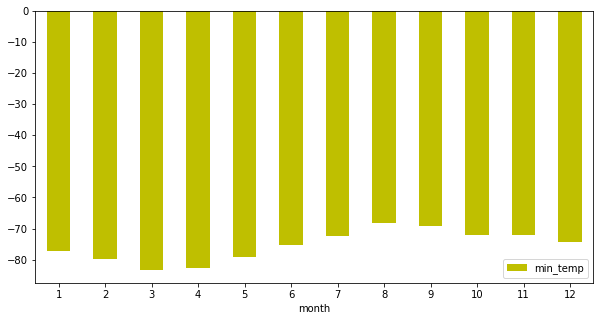

In [61]:
temps = mars_df.groupby(by=['month'])["min_temp"].mean()
## print(table_df.groupby(by=['month'])["min_temp"].mean())
#print(temps)
#print(temps.min())
#low_temp = temps.sort_values('min_temp')
#low_temp
temps
mars_df = pd.DataFrame(temps)
# df
# chart = df.plot.bar(x='month', y='min_temp', rot=0)
# chart
temp_chart = mars_df.plot.bar(rot=0,figsize= (10,5), color="y" )
temp_chart

<AxesSubplot:xlabel='month'>

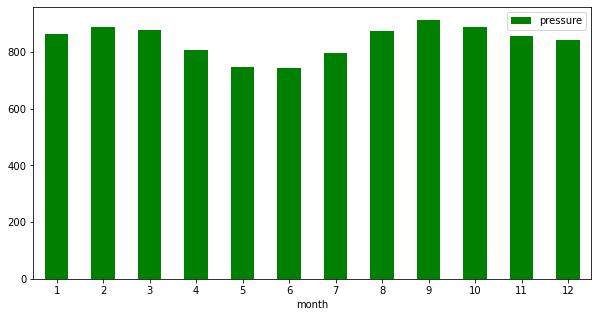

In [62]:
pressure = table_df.groupby(by=['month'])["pressure"].mean()
pressure_df = pd.DataFrame(pressure)
pressure_chart = pressure_df.plot.bar(rot=0,figsize= (10,5), color="g")
pressure_chart

In [65]:
mars_df.to_csv("WeatherData.csv", index = False)